In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [248]:
#Load Datasets 
data_train = pd.read_csv('train.csv').drop(columns=['ID'])
data_test = pd.read_csv('test.csv')

In [249]:
data_train.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [250]:
print('#\t Column')
i=1 

for column in data_train.columns:
    print('{}\t{}'.format(i,column))
    i=i+1

#	 Column
1	Gender
2	Ever_Married
3	Age
4	Graduated
5	Profession
6	Work_Experience
7	Spending_Score
8	Family_Size
9	Var_1
10	Segmentation


(array([2268.,    0.,    0., 1972.,    0.,    0., 1858.,    0.,    0.,
        1970.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

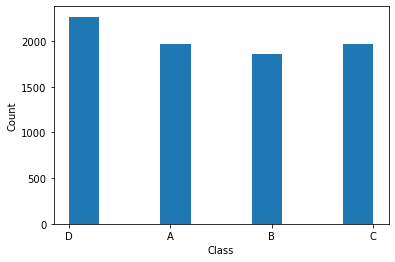

In [251]:
plt.xlabel('Class')
plt.ylabel('Count')
plt.hist(x=data_train['Segmentation'])

In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
columnsToEncode = ["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1"]
labelEncoder = LabelEncoder()

for column in columnsToEncode:    
    labelEncoder.fit(data_train[column])
    data_train[column]=labelEncoder.transform(data_train[column])

In [254]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,8068.0,0.547471,0.497772,0.0,0.0,1.0,1.0,1.0
Ever_Married,8068.0,0.610188,0.522109,0.0,0.0,1.0,1.0,2.0
Age,8068.0,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
Graduated,8068.0,0.635102,0.501113,0.0,0.0,1.0,1.0,2.0
Profession,8068.0,2.885226,2.631486,0.0,0.0,3.0,5.0,9.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.0,1.0,4.0,14.0
Spending_Score,8068.0,1.359941,0.848418,0.0,1.0,2.0,2.0,2.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.0,3.0,4.0,9.0
Var_1,8068.0,4.166212,1.443713,0.0,3.0,5.0,5.0,7.0


In [255]:
columnsToChange = ['Age','Profession','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
scaler = StandardScaler()
scaler.fit(data_train[columnsToChange])

data_train[columnsToChange] = scaler.transform(data_train[columnsToChange])

In [258]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,8068.0,5.474715e-01,0.497772,0.000000,0.000000,1.000000,1.000000,1.000000
Ever_Married,8068.0,6.101884e-01,0.522109,0.000000,0.000000,1.000000,1.000000,2.000000
Age,8068.0,1.253817e-16,1.000062,-1.523992,-0.805887,-0.207467,0.570480,2.724793
Graduated,8068.0,6.351016e-01,0.501113,0.000000,0.000000,1.000000,1.000000,2.000000
Profession,8068.0,-2.718450e-17,1.000062,-1.096492,-1.096492,0.043619,0.803692,2.323840
Work_Experience,7239.0,-1.119578e-16,1.000069,-0.775471,-0.775471,-0.481917,0.398745,3.334286
Spending_Score,8068.0,6.549875e-16,1.000062,-1.603013,-0.424275,0.754462,0.754462,0.754462
Family_Size,7733.0,-1.510926e-16,1.000065,-1.208193,-0.555159,0.097875,0.750909,4.016078
Var_1,8068.0,-1.151643e-15,1.000062,-2.885941,-0.807837,0.577566,0.577566,1.962969


In [259]:
columnsToChange = ['Graduated','Gender','Ever_Married']

In [260]:
scaler.fit(data_train[columnsToChange])
data_train[columnsToChange] = scaler.transform(data_train[columnsToChange])

In [261]:
data_train.describe().T
y = data_train['Segmentation']
data_train.drop(columns=['Segmentation'],inplace=True)

In [262]:
data_train.info()
data_train.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   float64
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   float64
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   float64
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   float64
 7   Family_Size      7733 non-null   float64
 8   Var_1            8068 non-null   float64
dtypes: float64(9)
memory usage: 567.4 KB


In [263]:
y

0       D
1       A
2       B
3       B
4       A
       ..
8063    D
8064    D
8065    D
8066    B
8067    B
Name: Segmentation, Length: 8068, dtype: object

In [264]:
from sklearn.decomposition import PCA

In [280]:
pca = PCA(n_components=8)
pca.fit(data_train)

PCA(n_components=8)

In [274]:
x_new = pca.transform(data_train)

In [275]:
x_new = pd.DataFrame(x_new) 

In [276]:
x_new = pd.concat([x_new,pd.DataFrame(y)],axis=1)

In [269]:
x_new.columns=['x','y','Segmentation']

In [270]:
x_new['x']

0      -2.419222
1       1.347223
2       1.514545
3       1.678433
4      -1.103592
          ...   
8063         NaN
8064         NaN
8065         NaN
8066         NaN
8067         NaN
Name: x, Length: 8068, dtype: float64

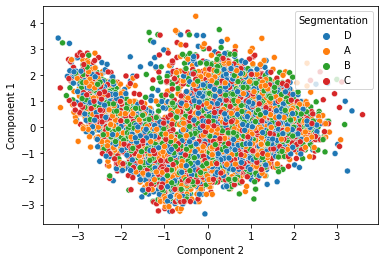

In [271]:
plt.xlabel('Component 2')
plt.ylabel('Component 1')
sns.scatterplot(x=x_new['x'],y=x_new['y'],hue=x_new['Segmentation'])
plt.show()

In [281]:
print(pca.explained_variance_ratio_)

[0.24471512 0.15256999 0.13157046 0.11008412 0.10377653 0.09699366
 0.07531734 0.04939276]
